In [17]:
from datetime import datetime

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from   tensorflow import keras

%matplotlib inline
print(tf.__version__)

1.13.1


In [15]:
def plot_series(time, series, plot_format='-', start=0, end=None):
    plt.plot(time[start:end], series[start:end], plot_format)
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.grid(True)

In [3]:
def trend(time, slope=0):
    return slope * time

In [4]:
def seasonal_pattern(season_time):
    '''Any arbitrary pattern will do here'''
    return np.where(season_time < 0.4, 
                    np.cos(2*np.pi*season_time), 
                    1 / np.exp(3*season_time))

In [5]:
def seasonality(time, period, amplitude=1, phase=0):
    '''Repeats seasonal_pattern at each time period'''
    season_time = ((time + phase) % period) / period
    return amplitude * seasonal_pattern(season_time)

In [11]:
def noise(time, noise_level=1, seed=None):
    seed = seed or int(datetime.now().timestamp())
    rnd = np.random.RandomState(seed)
    return rnd.randn(len(time)) * noise_level

In [12]:
time = np.arange(4 * 365 + 1, dtype='float32')
baseline = 10
series = trend(time, 0.1)
amplitude = 40
slope = 0.05
noise_level = 5

In [13]:
series = (baseline 
          + trend(time, slope) 
          + seasonality(time, period=365, amplitude=amplitude))
series += noise(time, noise_level)

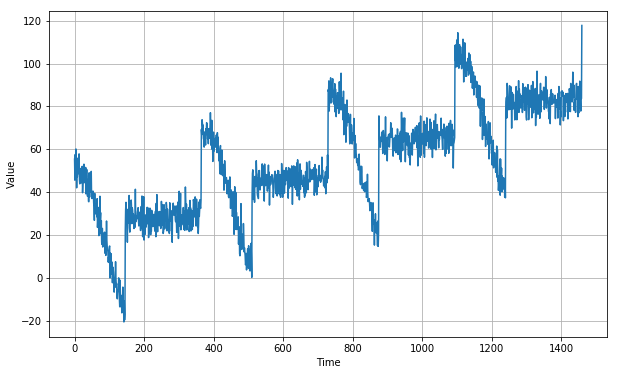

In [18]:
plt.figure(figsize=(10, 6))
plot_series(time, series)

# Naive Forecast